In [2]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, davies_bouldin_score

#!pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import SpectralClustering

#!pip install bioinfokit
from bioinfokit.analys import stats
from scipy import stats

from matplotlib import projections
from mpl_toolkits.mplot3d import Axes3D


#import pyodbc

In [ ]:
# conn = pyodbc.connect(DRIVER = '{ODBC Driver 17 for SQL Server}',
#                       SERVER = 'med000008646',
#                       DATABASE = 'db_sifods',
#                       UID = 'ussifods',
#                       PWD = 'sifods')

# df = pd.read_sql_query(" select CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,FECHA_REALIZADA,FINALGRADE from [acfm].[sistema.mooc_carga_actividad] where CANAL='PERUEDUCA' and CAMPUS=7  and CURID IN (37,24,23,28,42,43,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377) and NOMBRE_ACTIVIDAD IN ('Cuestionario de entrada','Cuestionario de salida')",conn)
# df.head(3)

## 01 Seleccion de datos

Los datos fueron recopilados de las tablas  **[acfm].[sistema.mooc_carga_actividad]** y **[dct].[maestro.nexus_escale]** de la base de datos  db_sifods del servidor med000008646 
* pap01.csv (dataset 01) hace referencia a los cursos mooc de PERUEDUCA . en este dataset encontramos variables como
  * CANAL.- solo se consideró el canal de PERUEDUCA en donde estan alojados los cursos mooc 
  * CAMPUS.- se esta trabajando con el campus 07 ya que ahi es donde se encuentran los codigos de los cursos
  * CURID.- Se tiene la lista 03 cursos habilitados hasta el mes de julio en donde a su vez estos cursos se dividen en 6 niveles. cada nivel esta dedicado a un grupo de docentes (37,24,23,28,42,43,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377)
  * FULLNAME.- Nombre completo del curso y el nivel al cual corresponde 
  * IDNUMBER.- Numero de Documento Nacional de indentidad
  * NOMBRE_ACTIVIDAD.- Acitividad que realizó en el curso. en esta ocasión solo se trabaja con Cuestionario de Salida y Cuestionario de Entrada
  * TIMESTART.- Fecha de inicio de actividades
  * FECHA_REALIZADA.- Fecha de Actividad realizada 
  * FINALGRADE.- Nota correspondiente a la actividad realizada 
* Docentespap01.csv (dataset 02) hace referiencia a la caracterizacion de docentes. en este data set encontramos las siguientes variables.
  * DNI.- Documento Nacional de Identidad del docente
  * NIVEL_NEXUS.- Nivel de ejercicio de funciones  
  * DESCRIPCION_CARGO.- Cargo que ocupa el docente
  * SITUACIÓN_LABORAL.- Situacion actual laboral del docente 
  * EDAD.- Edad del docente
  * RANGO_EDAD.- Rango clasifidacdo de edad del docente
  * D_DTO.- Departamento
  * D_PROV.- Provincia
  * D_DIST.- Distrito
  * D_DREUGEL.- Ugel el cual pertenece el docente
  * ESCALA_DIFODS.- Escala magisterial
  * DAREACENSO.- Ambito demografico

In [51]:
# Importando data inicial
df=pd.read_csv("D:/xampp/py001_paptic/data/pap01.csv",sep=";")
df


,CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,TIMESTART,FECHA_REALIZADA,FINALGRADE
0,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,46246054,Cuestionario de salida,8/04/2022,27/06/2022,18
1,PERUEDUCA,7,42,Educación híbrida para el desarrollo de compet...,26687120,Cuestionario de entrada,28/05/2022,16/05/2022,16
2,PERUEDUCA,7,2376,Herramientas de colaboración para el aprendiza...,40372425,Cuestionario de salida,10/06/2022,20/07/2022,20
3,PERUEDUCA,7,43,Educación híbrida para el desarrollo de compet...,19431457,Cuestionario de entrada,28/05/2022,12/04/2022,8
4,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,46101706,Cuestionario de salida,10/06/2022,NaN,0
...,...,...,...,...,...,...,...,...,...
206753,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,16785968,Cuestionario de salida,10/06/2022,1/07/2022,20
206754,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,41694019,Cuestionario de entrada,10/06/2022,12/07/2022,18
206755,PERUEDUCA,7,2375,Herramientas de colaboración para el aprendiza...,42716774,Cuestionario de salida,10/06/2022,15/07/2022,18
206756,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,41694019,Cuestionario de salida,10/06/2022,19/07/2022,20


In [50]:
docentes = pd.read_csv("D:/xampp/py001_paptic/data/docentespap01.csv",sep=";")
docentes

,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO
0,9761775,Secundaria,PROFESOR,CONTRATADO,50.0,41-50,LIMA,LIMA,EL AGUSTINO,UGEL 05 SAN JUAN DE LURIGANCHO,1.0,Urbana
1,9384369,Inicial - Cuna-jardín,PROFESOR,NOMBRADO,52.0,51-60,LIMA,LIMA,MIRAFLORES,UGEL 07 SAN BORJA,4.0,Urbana
2,9632145,Secundaria,PROFESOR,NOMBRADO,53.0,51-60,CALLAO,CALLAO,VENTANILLA,UGEL VENTANILLA,3.0,Urbana
3,9423721,Inicial - Jardín,PROFESOR,CONTRATADO,54.0,51-60,LIMA,LIMA,EL AGUSTINO,UGEL 05 SAN JUAN DE LURIGANCHO,1.0,Urbana
4,9349654,Secundaria,PROFESOR,NOMBRADO,54.0,51-60,LIMA,LIMA,SANTIAGO DE SURCO,UGEL 07 SAN BORJA,4.0,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
384670,80448201,Secundaria,PROFESOR,CONTRATADO,46.0,41-50,HUANUCO,DOS DE MAYO,LA UNION,UGEL DOS DE MAYO,1.0,Urbana
384671,76009147,Inicial - Jardín,PROFESOR,CONTRATADO,24.0,18-30,SAN MARTIN,EL DORADO,SAN MARTIN,UGEL EL DORADO,1.0,Rural
384672,80111599,Secundaria,PROFESOR,CONTRATADO,45.0,41-50,CAJAMARCA,SANTA CRUZ,SANTA CRUZ,UGEL SANTA CRUZ,1.0,Urbana
384673,77210936,Secundaria,PROFESOR,CONTRATADO,26.0,18-30,CAJAMARCA,JAEN,CHONTALI,UGEL JAÉN,1.0,Rural


## 02 Pré Procesamiento de datos 

In [56]:
#Eliminando datos duplicados
df = df.drop_duplicates()
df

,CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,TIMESTART,FECHA_REALIZADA,FINALGRADE
0,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,46246054.0,Cuestionario de salida,8/04/2022,27/06/2022,18
1,PERUEDUCA,7,42,Educación híbrida para el desarrollo de compet...,26687120.0,Cuestionario de entrada,28/05/2022,16/05/2022,16
2,PERUEDUCA,7,2376,Herramientas de colaboración para el aprendiza...,40372425.0,Cuestionario de salida,10/06/2022,20/07/2022,20
3,PERUEDUCA,7,43,Educación híbrida para el desarrollo de compet...,19431457.0,Cuestionario de entrada,28/05/2022,12/04/2022,8
5,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,23274599.0,Cuestionario de entrada,1/06/2022,15/07/2022,10
...,...,...,...,...,...,...,...,...,...
206753,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,16785968.0,Cuestionario de salida,10/06/2022,1/07/2022,20
206754,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,41694019.0,Cuestionario de entrada,10/06/2022,12/07/2022,18
206755,PERUEDUCA,7,2375,Herramientas de colaboración para el aprendiza...,42716774.0,Cuestionario de salida,10/06/2022,15/07/2022,18
206756,PERUEDUCA,7,2377,Herramientas de colaboración para el aprendiza...,41694019.0,Cuestionario de salida,10/06/2022,19/07/2022,20


In [57]:
df['IDNUMBER']=pd.to_numeric(df['IDNUMBER'], errors='coerce')

In [58]:
df=df.dropna()
df.isnull().sum()
df.shape

(128130, 9)

In [59]:
#from ast import Index
tdf = df.loc[:,['CURID','IDNUMBER','NOMBRE_ACTIVIDAD','FINALGRADE']]

tdf_pivot = pd.pivot_table(tdf,index=['CURID','IDNUMBER'],columns='NOMBRE_ACTIVIDAD', values='FINALGRADE').reset_index()
tdf_pivot.head(10) 

NOMBRE_ACTIVIDAD,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida
0,23,82694.0,6.0,NaN
1,23,100513.0,14.0,NaN
2,23,116632.0,20.0,14.0
3,23,445512.0,8.0,20.0
4,23,446097.0,6.0,14.0
5,23,446379.0,10.0,20.0
6,23,446666.0,12.0,18.0
7,23,447268.0,10.0,20.0
8,23,480752.0,20.0,20.0
9,23,484172.0,10.0,18.0


In [60]:
# Reemplazando valores nulos
tdf_pivot["Cuestionario de entrada"] = tdf_pivot["Cuestionario de entrada"].fillna(0)
tdf_pivot["Cuestionario de salida"] = tdf_pivot["Cuestionario de salida"].fillna(0)

In [61]:
tdf_pivot.shape

(70607, 4)

In [62]:
dataf_1 = tdf_pivot.merge(docentes , how='left', left_on='IDNUMBER', right_on='DNI' )

In [63]:
diccionario_cursos = {37 : 1 ,24 : 1,23 : 1 ,28 : 1 ,42 : 1 ,43 : 1 ,
                        2366 : 2,2367 : 2,2368 : 2,2369 : 2,2370 : 2,2371 : 2,
                        2372 : 3 ,2373 : 3 ,2374 : 3 ,2375 : 3 ,2376 : 3 ,2377 : 3 }

In [64]:
dataf_1['G_CURSOS'] = dataf_1['CURID'].map(diccionario_cursos)
dataf_1.head()

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS
0,23,82694.0,6.0,0.0,82694.0,Secundaria,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1.0,Rural,1
1,23,100513.0,14.0,0.0,100513.0,Secundaria,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1.0,Rural,1
2,23,116632.0,20.0,14.0,116632.0,Secundaria,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,45.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,Rural,1
3,23,445512.0,8.0,20.0,445512.0,Secundaria,PROFESOR,CONTRATADO,49.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,Rural,1
4,23,446097.0,6.0,14.0,446097.0,Secundaria,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,HUANUCO,SANTA MARIA DEL VALLE,UGEL HUÁNUCO,1.0,Rural,1


## 03 Transformación

In [74]:
dataf_1.isnull().sum()

CURID                      0
IDNUMBER                   0
Cuestionario de entrada    0
Cuestionario de salida     0
DNI                        0
NIVEL_NEXUS                0
DESCRIPCION_CARGO          0
SITUACION_LABORAL          0
EDAD                       0
RANGO_EDAD                 0
D_DPTO                     0
D_PROV                     0
D_DIST                     0
D_DREUGEL                  0
ESCALA_DIFODS              0
DAREACENSO                 0
G_CURSOS                   0
dtype: int64

In [75]:
# Reemplazar los valores null de la columna ESCALA DIFODS por el valor -1 
dataf_1['ESCALA_DIFODS']=dataf_1['ESCALA_DIFODS'].fillna(-1)
dataf_1=dataf_1.dropna()


In [67]:
dataf_1.isnull().sum()

CURID                      0
IDNUMBER                   0
Cuestionario de entrada    0
Cuestionario de salida     0
DNI                        0
NIVEL_NEXUS                0
DESCRIPCION_CARGO          0
SITUACION_LABORAL          0
EDAD                       0
RANGO_EDAD                 0
D_DPTO                     0
D_PROV                     0
D_DIST                     0
D_DREUGEL                  0
ESCALA_DIFODS              0
DAREACENSO                 0
G_CURSOS                   0
dtype: int64

In [68]:
# print(df["DESCRIPCION_CARGO"].value_counts())
# print("")
# print(df["SITUACION_LABORAL"].value_counts())
# print("")
# print(df["ESCALA_DIFODS"].value_counts())
# print("")
# print(df["DAREACENSO"].value_counts())
print(dataf_1["NIVEL_NEXUS"].value_counts())

Primaria                          36534
Secundaria                        28149
Básica Alternativa-Avanzado          75
Inicial - Jardín                     27
Básica Especial-Primaria              6
Básica Alternativa-Inicial e I        5
Name: NIVEL_NEXUS, dtype: int64


In [69]:
# Reclasificando variables
dataf_1['NIVEL_NEXUS'] = np.where(dataf_1['NIVEL_NEXUS'] =='Inicial - Jardín',1, np.where(dataf_1['NIVEL_NEXUS'] =='Primaria',2,np.where(dataf_1['NIVEL_NEXUS'] =='Secundaria',3,4)))
dataf_1['DAREACENSO'] = np.where(dataf_1['DAREACENSO'] == 'Rural', 1 , 2)
dataf_1

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS
0,23,82694.0,6.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1.0,1,1
1,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1.0,1,1
2,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,45.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,1,1
3,23,445512.0,8.0,20.0,445512.0,3,PROFESOR,CONTRATADO,49.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,1,1
4,23,446097.0,6.0,14.0,446097.0,3,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,HUANUCO,SANTA MARIA DEL VALLE,UGEL HUÁNUCO,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70589,2377,47930383.0,0.0,0.0,47930383.0,3,PROFESOR,CONTRATADO,28.0,18-30,LIMA,LIMA,LURIGANCHO,UGEL 06 ATE,1.0,2,3
70592,2377,70148283.0,10.0,0.0,70148283.0,3,PROFESOR,CONTRATADO,26.0,18-30,APURIMAC,CHINCHEROS,OCOBAMBA,UGEL CHINCHEROS,1.0,1,3
70600,2377,80064289.0,18.0,20.0,80064289.0,3,PROFESOR,NOMBRADO,43.0,41-50,AYACUCHO,LA MAR,SAN MIGUEL,UGEL LA MAR,2.0,2,3
70603,2377,80473698.0,2.0,20.0,80473698.0,3,PROFESOR,NOMBRADO,43.0,41-50,ANCASH,SIHUAS,SICSIBAMBA,UGEL SIHUAS,1.0,1,3


In [70]:
dataf_1.columns

Index(['CURID', 'IDNUMBER', 'Cuestionario de entrada',
       'Cuestionario de salida', 'DNI', 'NIVEL_NEXUS', 'DESCRIPCION_CARGO',
       'SITUACION_LABORAL', 'EDAD', 'RANGO_EDAD', 'D_DPTO', 'D_PROV', 'D_DIST',
       'D_DREUGEL', 'ESCALA_DIFODS', 'DAREACENSO', 'G_CURSOS'],
      dtype='object')

In [76]:
cursos=df[['CURID','FULLNAME']]
cursos=cursos.drop_duplicates()
dataf_2 = dataf_1.merge(cursos, how='left', left_on='CURID', right_on='CURID')
dataf_2.head(3)

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS,FULLNAME
0,23,82694.0,6.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1.0,1,1,Educación híbrida para el desarrollo de compet...
1,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1.0,1,1,Educación híbrida para el desarrollo de compet...
2,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,45.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,1,1,Educación híbrida para el desarrollo de compet...


## 04 Mineria de datos

In [72]:
# función para buscar el optimó numero de codo
def grafico_codo(data_scaled):
  range_n_clusters = range(1, 11)
  inertias = []

  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(n_clusters = n_clusters, n_init = 20, random_state = 123)
      modelo_kmeans.fit(X=data_scaled)
      inertias.append(modelo_kmeans.inertia_)

  fig, ax = plt.subplots(1, 1)
  ax.plot(range_n_clusters, inertias, marker='o')
  ax.set_title("Número Óptimo de Cluster")
  ax.set_xlabel('Número clusters')
  plt.show()

# función para prueba de normalidad
def prueba_normalidad(datos, data_scaled):

  df_swt = pd.DataFrame(index=['Estadístico de la prueba', 'p-value'])

  for i, k in enumerate(datos.keys()):
    (swt, swp) = stats.normaltest(data_scaled[:,i])
    df_swt[k] = [float("{:.4f}".format(swt)), float("{:.4f}".format(swp))]
    
  display(df_swt)

#Función grafico de cluster dos variables
def grafico_cluster_principal(datos, c1, c2):
  y = datos['clusters']
  plt.figure(figsize=(15, 15))
  fig, ax = plt.subplots()
  sc = ax.scatter(datos[c1], datos[c2],c=y)
  ax.legend(*sc.legend_elements(), title='Grupos')
  plt.xlabel(c1,size=14)
  plt.ylabel(c2,size=14)
  #plt.axis("equal")
  plt.title('Clusterización K-means(k=4)', size=18)
  plt.show()

# Función grafico de cluster tres variables
def grafico_cluster_3d(datos,x,y,z):
    y1 = datos['clusters']
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(15, 40)
    plt.xlabel(x,size= 14)
    plt.ylabel(y,size= 14)
    plt.title("Clusterización K-means(k=4)",size= 20)
    sc = ax.scatter(datos[x],datos[y],datos[z],c=y1)
    ax.legend(*sc.legend_elements(), title='Grupos')
    plt.show()

# Funcion para calcular prueba de kruskall_wallis , prueba de diferencia de grupos
def kruskal_wallis(datos):
  df_kwt = pd.DataFrame(index=['Estadístico de la prueba', 'p-value'])
  var1 = ['NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']
  for c in var1:
    datos_grupo1_temp  = datos.loc[datos['clusters']==1][c].values
    datos_grupo2_temp  = datos.loc[datos['clusters']==2][c].values
    datos_grupo3_temp  = datos.loc[datos['clusters']==3][c].values
    datos_grupo4_temp  = datos.loc[datos['clusters']==4][c].values

    (stkw, pvkw) = stats.kruskal(datos_grupo1_temp, datos_grupo2_temp, datos_grupo3_temp, datos_grupo4_temp)

    df_kwt[c] = [float("{:.4f}".format(stkw)), float("{:.4f}".format(pvkw))]
  display(df_kwt)

# funcion para comparar el numero de cluster
def comparar_clusters(data_scaled):
   for i in range(3,7) :
    predicted_clusters_kmeans = KMeans(n_clusters=i, random_state=1).fit_predict(X=data_scaled)
    davies_bouldin_score_kmeans = davies_bouldin_score(data_scaled, predicted_clusters_kmeans)
    silhouette_score_kmeans = silhouette_score(data_scaled, predicted_clusters_kmeans)

    predicted_clusters_miniba = MiniBatchKMeans(n_clusters=i, random_state=2).fit_predict(X=data_scaled)
    davies_bouldin_score_miniba = davies_bouldin_score(data_scaled, predicted_clusters_miniba)
    silhouette_score_miniba = silhouette_score(data_scaled, predicted_clusters_miniba)

    result_comp_clusters = pd.DataFrame(index=['Índice de Davies-Bouldin', 'Índice de Silhouette'])
    result_comp_clusters['K-means'] = [davies_bouldin_score_kmeans, silhouette_score_kmeans]
    result_comp_clusters['MiniBatchKM'] = [davies_bouldin_score_miniba, silhouette_score_miniba]
    display(result_comp_clusters)

def analisis_resultados(datosini,data_norm):
    var2 = ['NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']
    # los resultados del modelo se guardan en labels_ dentro del modelo mod_clus01
    predicted_clusters_kmeans = KMeans(n_clusters=4, random_state=1).fit_predict(X=data_norm)
    datosini['clusters'] = predicted_clusters_kmeans + 1
    gr1 = datosini.groupby('clusters').agg(N = ("clusters", 'count'))
    #gr2 = gr1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    display(gr1)
    #datosini['clusters'].value_counts()

    # Prueba de normalidad de var2
    prueba_normalidad( datosini.loc[:,var2],data_norm)

    # Prueba no parametrica de diferencia de grupos
    kruskal_wallis(datosini)

    # Visualizar grafico 2 var2
    grafico_cluster_principal(datosini, 'Cuestionario de entrada', 'Cuestionario de salida')

    # Visualizar grafico 3 var2
    grafico_cluster_3d(datosini,'EDAD','Cuestionario de entrada','Cuestionario de salida')

# función para ver la correlacion de las variables
def plot_corr_v2(df):
    fig=plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

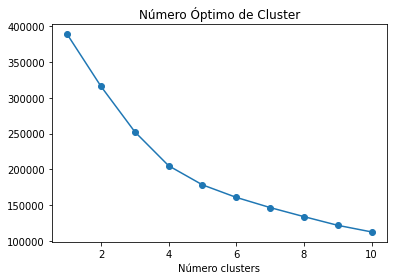

,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.346022,1.348075
Índice de Silhouette,0.255918,0.254670


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.207808,1.423782
Índice de Silhouette,0.288599,0.222454


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.225514,1.207551
Índice de Silhouette,0.259572,0.271902


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.210075,1.218461
Índice de Silhouette,0.250360,0.260526


In [78]:
# Seleccion de variables y normalización 
# StandardScaler().fit_transform(datos)
variables = ['IDNUMBER','NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']


dataf_2_norm = StandardScaler().fit_transform(dataf_2.loc[:,variables].drop('IDNUMBER',axis=1))


grafico_codo(dataf_2_norm)
comparar_clusters(dataf_2_norm)


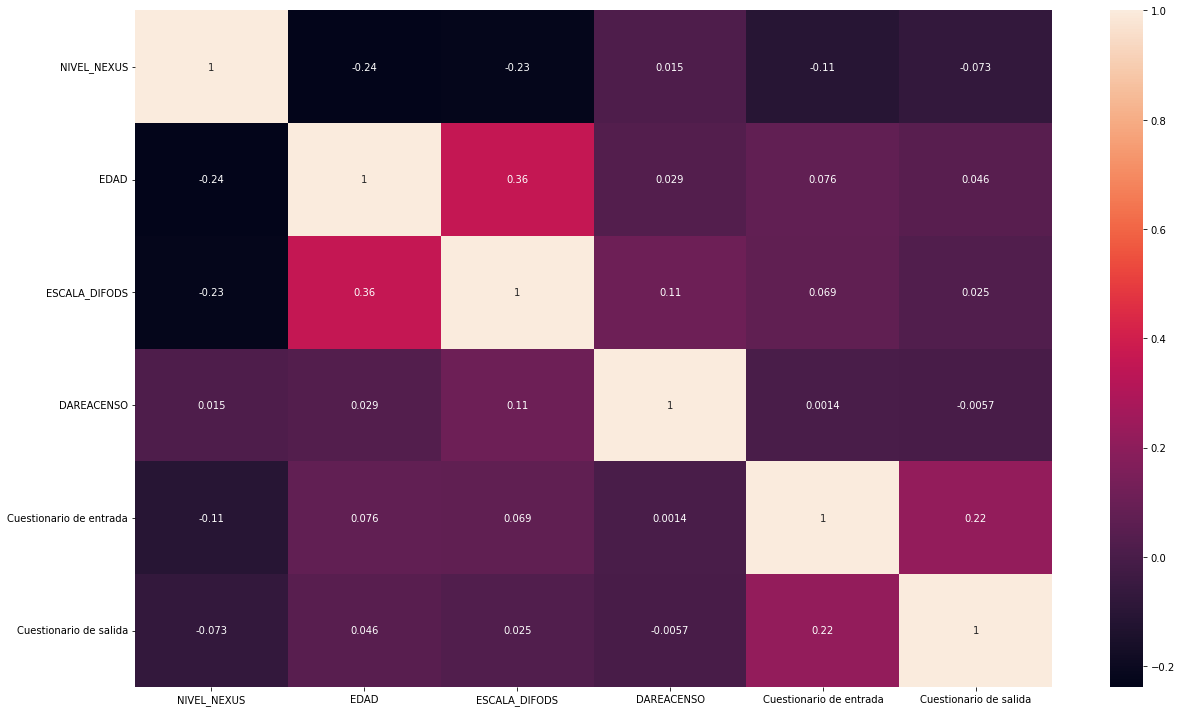

In [80]:
plot_corr_v2(dataf_2.loc[:,variables].drop('IDNUMBER',axis=1))

## 05 Interpretación y análisis

,N
clusters,
1,21647
2,12137
3,29634
4,1378


,NIVEL_NEXUS,EDAD,ESCALA_DIFODS,DAREACENSO,Cuestionario de entrada,Cuestionario de salida
Estadístico de la prueba,251553.2687,2394.4618,7653.4285,76554.2827,6101.558,12340.3908
p-value,0.0000,0.0000,0.0000,0.0000,0.000,0.0000


,NIVEL_NEXUS,EDAD,ESCALA_DIFODS,DAREACENSO,Cuestionario de entrada,Cuestionario de salida
Estadístico de la prueba,50025.5813,3166.4694,3606.6999,64795.0,2608.1718,34752.5296
p-value,0.0000,0.0000,0.0000,0.0,0.0000,0.0000


<Figure size 1080x1080 with 0 Axes>

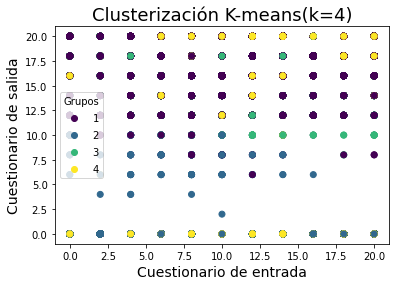

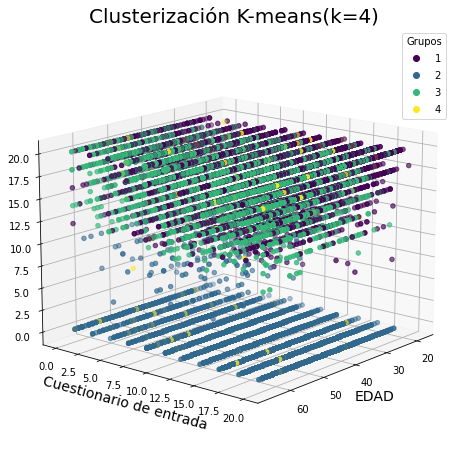

In [83]:
# Análiss de resultados de los cluster 
analisis_resultados(dataf_2,dataf_2_norm)


In [84]:
dataf_2.head()

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS,FULLNAME,clusters
0,23,82694.0,6.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1.0,1,1,Educación híbrida para el desarrollo de compet...,2
1,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1.0,1,1,Educación híbrida para el desarrollo de compet...,2
2,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,45.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,1,1,Educación híbrida para el desarrollo de compet...,1
3,23,445512.0,8.0,20.0,445512.0,3,PROFESOR,CONTRATADO,49.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1.0,1,1,Educación híbrida para el desarrollo de compet...,1
4,23,446097.0,6.0,14.0,446097.0,3,PROFESOR,CONTRATADO,48.0,41-50,HUANUCO,HUANUCO,SANTA MARIA DEL VALLE,UGEL HUÁNUCO,1.0,1,1,Educación híbrida para el desarrollo de compet...,1


In [112]:
dataf_2.groupby(['clusters'],as_index=True)["clusters"].count()


clusters
1    21647
2    12137
3    29634
4     1378
Name: clusters, dtype: int64

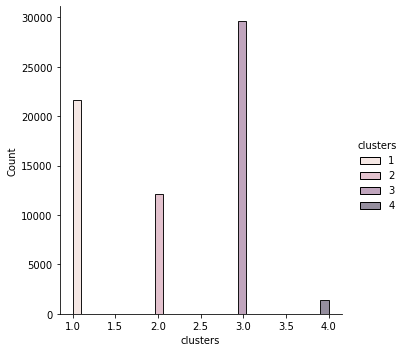

In [113]:
sns.displot(dataf_2, x = 'clusters', hue= 'clusters')

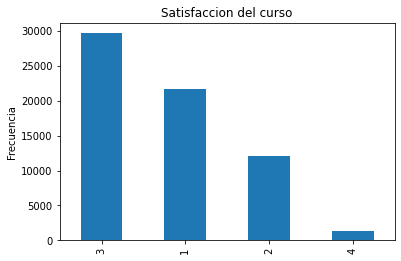

In [103]:
dataf_2['clusters'].value_counts(normalize = False).plot(kind='bar' color = )
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()